# 描述性统计 Statistical Summary
- 这项工作主要是让我们知道数据的整体状况怎么样，描述这个数据的“样子”
- 数据处理的最关键，也是最重要的一步
- 了解数据的概况，有助于后续的数据分析和挖掘

描述性统计的Python工具

PANDAS

NumPy和SciPy

- count 统计非NA的数量
- describe 针对series或者DF的列计算汇总统计
- min max 最小值和最大值
- quantile 样本分位数
- sum 求和
- mean 均值
- median 中位数
- mad 根据均值计算平均绝对离差
- var 方差
- std 标准差
- skew 偏度（三阶矩）
- kurt 峰度
- cumsum 累计和
- cumprod 累积乘积
- diff 一阶差分
- pct_change 计算百分比变化
- mode 计算众数
- cov 斜方差
- corrcoef 相关系数

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #画图模块
from datetime import datetime #时间模块
import scipy.stats as stats # 统计模块
from IPython.core.interactiveshell import InteractiveShell
import statsmodels.formula.api as smf  # OLS regression

#输出矢量图 渲染矢量图 魔法函数（Magic Functions）内嵌绘图
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

#显示每一个运行结果
InteractiveShell.ast_node_interactivity = 'all'

#输出或者打印的时候，不限制列或者行
pd.set_option('display.max_columns',None)

In [2]:
data = pd.read_csv('C:/Users/hp/Desktop/Python/Python-4/000001.csv')
data['Day'] = pd.to_datetime(data['Day'], format = '%Y-%m-%d')
data.set_index('Day', inplace = True)
data.sort_values(by = ['Day'], axis=0, ascending=True)
data

,Preclose,Open,Highest,Lowest,Close,Volume,Money
Day,,,,,,,
1990-12-19,,96.05,99.98,95.79,99.98,126000,4.940000e+05
1990-12-20,99.98,104.30,104.39,99.98,104.39,19700,8.400000e+04
1990-12-21,104.39,109.07,109.13,103.73,109.13,2800,1.600000e+04
1990-12-24,109.13,113.57,114.55,109.13,114.55,3200,3.100000e+04
1990-12-25,114.55,120.09,120.25,114.55,120.25,1500,6.000000e+03
...,...,...,...,...,...,...,...
2022-07-25,3269.97,3269.71,3273.18,3243.03,3250.39,27124574400,3.480000e+11
2022-07-26,3250.39,3254.19,3282.41,3246.04,3277.44,25946867600,3.340000e+11
2022-07-27,3277.44,3271.78,3282.57,3265.73,3275.76,24913148500,3.400000e+11


,Preclose,Open,Highest,Lowest,Close,Volume,Money
Day,,,,,,,
1990-12-19,,96.05,99.98,95.79,99.98,126000,4.940000e+05
1990-12-20,99.98,104.30,104.39,99.98,104.39,19700,8.400000e+04
1990-12-21,104.39,109.07,109.13,103.73,109.13,2800,1.600000e+04
1990-12-24,109.13,113.57,114.55,109.13,114.55,3200,3.100000e+04
1990-12-25,114.55,120.09,120.25,114.55,120.25,1500,6.000000e+03
...,...,...,...,...,...,...,...
2022-07-25,3269.97,3269.71,3273.18,3243.03,3250.39,27124574400,3.480000e+11
2022-07-26,3250.39,3254.19,3282.41,3246.04,3277.44,25946867600,3.340000e+11
2022-07-27,3277.44,3271.78,3282.57,3265.73,3275.76,24913148500,3.400000e+11


In [3]:
daily_data = data['1995-01':'2022-07'].copy()
daily_data['Close'] = pd.to_numeric(daily_data['Close'])
daily_data['Preclose'] = pd.to_numeric(daily_data['Preclose'])
daily_data['Raw_return'] = daily_data['Close'] / daily_data['Preclose'] - 1
daily_data['Log_return'] = np.log(daily_data['Close']) - np.log(daily_data['Preclose'])
daily_data

,Preclose,Open,Highest,Lowest,Close,Volume,Money,Raw_return,Log_return
Day,,,,,,,,,
1995-01-03,647.87,637.72,647.71,630.53,639.88,23451800,1.806930e+08,-0.012333,-0.012409
1995-01-04,639.88,641.90,655.51,638.86,653.81,42222000,3.069230e+08,0.021770,0.021536
1995-01-05,653.81,655.38,657.52,645.81,646.89,43012300,3.015330e+08,-0.010584,-0.010641
1995-01-06,646.89,642.75,643.89,636.33,640.76,48748200,3.537580e+08,-0.009476,-0.009521
1995-01-09,640.76,637.52,637.55,625.04,626.00,50985100,3.985190e+08,-0.023035,-0.023305
...,...,...,...,...,...,...,...,...,...
2022-07-25,3269.97,3269.71,3273.18,3243.03,3250.39,27124574400,3.480000e+11,-0.005988,-0.006006
2022-07-26,3250.39,3254.19,3282.41,3246.04,3277.44,25946867600,3.340000e+11,0.008322,0.008288
2022-07-27,3277.44,3271.78,3282.57,3265.73,3275.76,24913148500,3.400000e+11,-0.000513,-0.000513


In [4]:
Month_data = daily_data.resample('M')['Log_return'].sum().to_frame()  
Month_data['Raw_return'] = np.exp(Month_data['Log_return'])-1
Month_data

,Log_return,Raw_return
Day,,
1995-01-31,-0.141139,-0.131631
1995-02-28,-0.023979,-0.023694
1995-03-31,0.163651,0.177803
1995-04-30,-0.109315,-0.103552
1995-05-31,0.188901,0.207922
...,...,...
2022-03-31,-0.062604,-0.060685
2022-04-30,-0.065154,-0.063077
2022-05-31,0.044724,0.045739


In [32]:
Quarter_data = daily_data.resample('Q')['Log_return'].sum().to_frame()  
Quarter_data['Raw_return'] = np.exp(Quarter_data['Log_return'])-1
Quarter_data

,Log_return,Raw_return
Day,,
1995-03-31,-0.001467,-0.001466
1995-06-30,-0.025583,-0.025258
1995-09-30,0.135980,0.145660
1995-12-31,-0.263130,-0.231358
1996-03-31,0.001979,0.001981
...,...,...
2021-09-30,-0.006434,-0.006413
2021-12-31,0.019870,0.020069
2022-03-31,-0.112592,-0.106484


In [5]:
Year_data = daily_data.resample('Y')['Log_return'].sum().to_frame()  
Year_data['Raw_return'] = np.exp(Year_data['Log_return'])-1
Year_data

,Log_return,Raw_return
Day,,
1995-12-31,-0.154200,-0.142899
1996-12-31,0.501639,0.651425
1997-12-31,0.264019,0.302153
1998-12-31,-0.040505,-0.039695
1999-12-31,0.175423,0.191750
2000-12-31,0.416917,0.517277
2001-12-31,-0.230898,-0.206180
2002-12-31,-0.192575,-0.175167
2003-12-31,0.097735,0.102670


In [6]:
Year_data2 = daily_data.resample('Y')['Close'].last().to_frame()
Year_data2

,Close
Day,
1995-12-31,555.29
1996-12-31,917.02
1997-12-31,1194.10
1998-12-31,1146.70
1999-12-31,1366.58
2000-12-31,2073.48
2001-12-31,1645.97
2002-12-31,1357.65
2003-12-31,1497.04


## 均值 mean
算术平均：$ A_n = (a_1 + a_2 + a_3 + ... + a_n) / n $ 

In [7]:
daily_data['2000-01':'2021-12']['Raw_return'].mean()

0.0002997925742341234

In [8]:
Month_data['2000-01':'2021-12']['Raw_return'].mean()

0.00638659075285674

In [9]:
np.mean(daily_data['2000-01':'2021-12']['Raw_return'])

0.0002997925742341234

In [10]:
sum(daily_data['2000-01':'2021-12']['Raw_return']) / len(daily_data['2000-01':'2021-12']['Raw_return'])

0.0002997925742341234

In [11]:
daily_data['2000-01':'2021-12']['Raw_return'].describe().round(5)

count    5332.00000
mean        0.00030
std         0.01522
min        -0.08841
25%        -0.00651
50%         0.00064
75%         0.00740
max         0.09857
Name: Raw_return, dtype: float64

## 分位数 quantile
分位数（Quantile），亦称分位点，是指将一个随机变量的概率分布范围分为几个等份的数值点，常用的的中位数、四分位数、百分位数等
常见的分类方法：
- 中位数 Median
  - 当N是奇数时 $ m_{0.5} = X_{(N+1)/2} $

  - 当N是偶数时 $ m_{0.5} =( X_{(N/2)} + X_{(N/2+1)} )/2 $
- 四分位数Quartile
10分位数 常用在股票投资策略中

In [12]:
from statistics import quantiles

quantiles(daily_data['2000-01':'2021-12']['Raw_return'], n=10, method='inclusive')

[-0.016097081828110336,
 -0.008678806004592077,
 -0.004752631067066526,
 -0.001721643766958003,
 0.0006416905475513657,
 0.002879009623246542,
 0.005590864432495524,
 0.009490838188521967,
 0.016934368056506454]

In [13]:
quantiles(Month_data['2000-01':'2021-12']['Raw_return'], n=4)

[-0.03759568413564121, 0.0063653439661619515, 0.04587742274975387]

In [14]:
quantiles(daily_data['2000-01':'2021-12']['Raw_return'], n=10, method='exclusive')

[-0.016107902309649737,
 -0.008682174117724895,
 -0.004753759033724048,
 -0.0017217679867727932,
 0.0006416905475513657,
 0.0028793525212044368,
 0.005593687159267247,
 0.009506414116411222,
 0.016939114491093886]

In [44]:
seq = np.linspace(0,1,11)
seq

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [45]:
np.quantile(daily_data['2000-01':'2021-12']['Raw_return'],q=seq)

array([-0.08840689, -0.01609708, -0.00867881, -0.00475263, -0.00172164,
        0.00064169,  0.00287901,  0.00559086,  0.00949084,  0.01693437,
        0.09856839])

In [46]:
arr = np.array([1,2,3,4,5,6,7,8,9,10,11,12]) 
np.quantile(arr, (0.25, 0.50, 0.75))

array([3.75, 6.5 , 9.25])

In [47]:
quantiles(arr, n = 4, method='exclusive')

[3.25, 6.5, 9.75]

In [48]:
quantiles(arr, n = 4, method='inclusive')

[3.75, 6.5, 9.25]

## 波动率 Variance

$$\sigma^2=\frac{\sum(X-\mu)^2}{N}


In [15]:
np.var(daily_data['2000-01':'2021-12']['Raw_return'])

0.00023147179659664522

In [16]:
m = np.mean(daily_data['2000-01':'2021-12']['Raw_return'])
sum((daily_data['2000-01':'2021-12']['Raw_return'] - m)**2) / len(daily_data['2000-01':'2021-12']['Raw_return'])

0.00023147179659664522

In [17]:
np.std(daily_data['2000-01':'2021-12']['Raw_return'])

0.015214197205131962

In [21]:
from math import sqrt

sqrt(np.var(daily_data['2000-01':'2021-12']['Raw_return']))

0.015214197205131962

### 作业

计算每个月的波动率，也就是方差
- resample
- groupby

In [23]:
daily_data['2000-01':'2021-12']['Raw_return'].max()

0.09856839419466401

In [22]:
monthly_var = daily_data.resample('m')['Raw_return'].var().to_frame()
monthly_var.rename(columns={'Raw_return':'Variance'},inplace=True)
monthly_var

,Variance
Day,
1995-01-31,0.000260
1995-02-28,0.001130
1995-03-31,0.000551
1995-04-30,0.000407
1995-05-31,0.006924
...,...
2022-03-31,0.000299
2022-04-30,0.000335
2022-05-31,0.000107


## 正态分布

若随机变量X服从一个数学期望为$\mu$、方差为$\sigma^2$的正态分布，记为$N(\mu,\sigma^2)$。其概率密度函数为正态分布的期望值决定了其位置，其标准差$\sigma$决定了分布的幅度。当$\mu=0,\sigma=1$时的正态分布是标准正态分布。

若随机变量 X 服从一个位置参数为 μ 、尺度参数为 σ 的概率分布，且其概率密度函数为
$f(x)=\frac{1}{\sqrt(2π) σ}exp(−\frac{(x−μ)^2}{2σ^2})$

则这个随机变量就称为正态随机变量, 正态随机变量服从的分布就称为正态分布, 记作 X∼N(μ,σ2), 读作 X 服从 N(μ,σ2), 或 X 服从正态分布。
若 $X∼N(μ,σ^2),Y=\frac{X−μ}{σ}∼N(0,1)$.

当 μ=0,σ=1 时，正态分布就成为标准正态分布
$f(x) = \frac{1}{\sqrt(2π)}e^(-x^2/2)$

## 偏度和峰度

- 偏度（Skewness）是统计数据分布偏斜方向和程度的度量，是统计数据分布非对称程度的数字特征。定义上偏度是样本的三阶标准化矩。
     - 定义中包括正态分布（偏度=0），右偏分布（正偏，>0）,左偏分布（负偏，<0）
- 峰度（Kurtosis）表征概率密度分布曲线在平均值处峰度高低的特征。直观来看，峰度反应了峰部的尖度。
     - 定义中包括正态分布（峰度=3），厚尾（峰度>3）,瘦尾（峰度<3）


In [39]:
daily_data['1995-01':'2021-12']['Raw_return'].skew()
daily_data['1995-01':'2021-12']['Raw_return'].kurt()
# scipy.stats.kurtosis(daily_data['1995-01':'2021-12']['Raw_return'],fisher=False) - 3

0.6863037895353762

22.6381518680142

In [31]:
daily_data['2000-01':'2021-12']['Raw_return'].skew()
daily_data['2000-01':'2021-12']['Raw_return'].mean()

-0.2123482288976952

0.0002997925742341234

In [35]:
# Monthly data
Month_data['2000-01':'2021-12']['Raw_return'].skew()
Month_data['2000-01':'2021-12']['Raw_return'].kurt()

-0.12102256258064355

1.7808205665732815

In [36]:
# Quarterly data
Quarter_data['2000-01':'2021-12']['Raw_return'].skew()
Quarter_data['2000-01':'2021-12']['Raw_return'].kurt()

0.6703046199121782

1.5061694696000774

In [37]:
Year_data['2000-01':'2021-12']['Raw_return'].skew()
Year_data['2000-01':'2021-12']['Raw_return'].kurt()

1.1314511151614697

1.3602349892032164

In [40]:
def qiuhe(a,b):
    c = a * b
    return c

qiuhe(4,9)

36

In [41]:
result = np.random.normal(0, 1, 1000000)
result

array([-0.56761094,  1.01100477, -1.24012907, ..., -1.39700315,
        0.05714085, -0.19582416])

## 标准正态分布的直方图

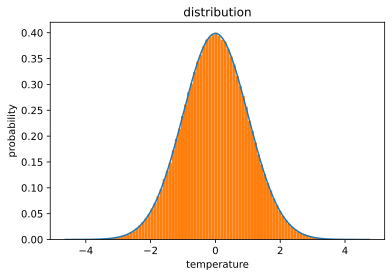

CPU times: total: 344 ms
Wall time: 378 ms


In [42]:
%%time
# 根据均值、标准差，求制定范围的正态分布概率值

def normfun(x, mu, sigma):
    pdf = np.exp(-((x - mu)**2)/(2*sigma**2)) / (sigma * np.sqrt(2*np.pi))
    return pdf


# 生成高斯分布的概率密度随机数
result = np.random.normal(0, 1, 1000000) # mean 0 and standard deviation 1

# np.arange()
# 函数返回一个有终点和起点的固定步长的排列，如[1,2,3,4,5]，起点是1，终点是6，步长为1
# 参数个数情况：np.arange()函数分为一个参数，两个参数，三个参数三种情况
# 1）一个参数时，参数值为终点，起点取默认值0，步长取默认值1
# 2）两个参数时，第一个参数为起点，第二个参数为终点，步长取默认值1
# 3）三个参数时，第一个参数为起点，第二个参数为终点，第三个参数为步长，其中步长支持小数

x = np.arange(min(result), max(result),0.01)

# 设定 y 轴，载入刚才的正态分布函数
y = normfun(x, result.mean(), result.std())
plt.plot(x, y) # 这里画出理论的正态分布概率曲线

# 这里画出实际的参数概率与取值关系
fig = plt.hist(result, bins=100, rwidth=1, density=True) # bins个柱状图，宽度是rwidth（0~1），=1没有缝隙
plt.title('distribution')
plt.xlabel('temperature')
plt.ylabel('probability')
# 输出
plt.show() # 最后图片的概率和不为1是因为正态分布是从负无穷到正无穷，这里截取了数据最小值到最大值的分布


## 在日收益率直方图上添加正态分布密度曲线

CPU times: total: 453 ms
Wall time: 449 ms


Text(0, 0.5, 'Probability')

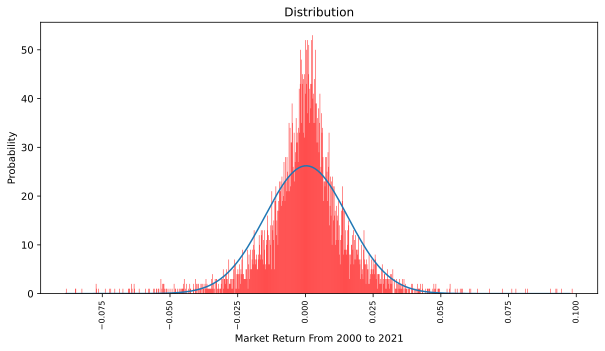

In [49]:
%%time
retmean = daily_data['2000-01':'2021-12']['Raw_return'].mean()
retstd = daily_data['2000-01':'2021-12']['Raw_return'].std()
retmin = daily_data['2000-01':'2021-12']['Raw_return'].min()
retmax = daily_data['2000-01':'2021-12']['Raw_return'].max()


def normfun(x, mu, sigma):
    pdf = np.exp(-((x - mu)**2) /
                 (2 * sigma**2)) / (sigma * np.sqrt(2 * np.pi))
    return pdf


x = np.arange(retmin, retmax, 0.001) # 0.001 0.002 0.003 0.004.。。。 0.099 0.100  0.101
y = normfun(x, retmean, retstd)
fig = plt.figure(figsize=(10, 5))

plt.plot(x, y)

fig = plt.hist(daily_data['2000-01':'2021-12']['Raw_return'], # index daily market excess return
               bins=1000,
               histtype='bar',
               color='r',
               alpha=0.9)
plt.xticks(rotation=90, fontsize=8) # x轴显示方法
plt.title('Distribution')
plt.xlabel('Market Return From 2000 to 2021')
plt.ylabel('Probability')